In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb=pd.read_csv(r"C:\Users\sivak\OneDrive\data\trainings\datasets\Fiberbits_v1.csv")

In [3]:
fb.shape

(100000, 9)

In [4]:
fb.head()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,4,1,0,121,4,85
1,0,1581,85,4,1,0,133,4,85
2,0,1594,82,4,1,0,118,4,85
3,0,1594,82,4,1,0,123,4,85
4,1,1609,80,4,1,0,177,4,85


In [5]:
x_train=fb.drop(["active_cust"],axis=1)
y_train=fb["active_cust"]

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1,verbose=1,random_state=42,oob_score=True)
rf.fit(x_train,y_train)
rf.get_params()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

In [14]:
rf.oob_score_

0.8812

In [15]:
rf.feature_importances_

array([0.19359065, 0.10179482, 0.01204988, 0.12963119, 0.10762969,
       0.15607144, 0.08014615, 0.21908617])

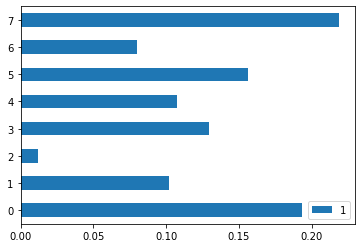

In [20]:
pd.DataFrame(list(zip(x_train.columns,rf.feature_importances_))).plot(kind="barh")

In [25]:
importnace=rf.feature_importances_

In [28]:
features=list(x_train.columns)

In [24]:
indcies=np.argsort(rf.feature_importances_)

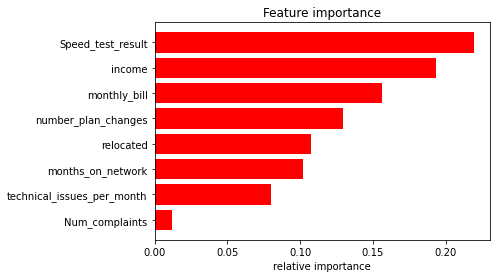

In [32]:
plt.barh(range(len(indcies)),importnace[indcies],color="r",align="center")
plt.xlabel("relative importance")
plt.yticks(range(len(indcies)),[features[i] for i in indcies])
plt.title("Feature importance")
plt.show()